In [7]:
package '9-Verification-simplified' {
	import VerificationCases::*;
	import Definitions::*;
	
	package Definitions {
	
		requirement def <'2'> MassRequirement {
			attribute massActual :> ISQ::mass;
			attribute massReqd :> ISQ::mass;
			
			doc /* The actual mass shall be less than or equal to the required mass limit. */
			
			require constraint { massActual <= massReqd }
		}
		
		part def Vehicle {
			attribute mass :> ISQ::mass;
		}
		
		part def MassVerificationSystem;
		part def Scale;
		part def TestOperator;
		
		individual def TestVehicle1 :> Vehicle;
		individual def TestVehicle2 :> Vehicle;

		individual def TestSystem :> MassVerificationSystem;
	
		verification def MassTest {
			objective massVerificationObjective {
				verify requirement massRequirement : MassRequirement;
			}
		}
				
	}
	
	package Usages {
	
		requirement <'2.1'> vehicleMassRequirement : MassRequirement {
			subject vehicle : Vehicle;
			doc /* The vehicle mass shall be less than or equal to 2500 kg. */
			
			:>> massActual = vehicle.mass;		
			:>> massReqd = 2500 [SI::kg];
		}
		
		part vehicle1_c2 : Vehicle {
			// ...
		}
		
		verification vehicleMassTest : MassTest {
			subject testVehicle : Vehicle;
			objective vehicleMassVerificationObjective {
				// The subject of the verify is automatically bound to 'testVehicle' here.
				verify vehicleMassRequirement :>> massRequirement;
			}
			
			action collectData {
				in part testVehicle : Vehicle = vehicleMassTest.testVehicle;
				out massMeasured :> ISQ::mass;
			}
			
			action processData {
				in massMeasured :> ISQ::mass = collectData.massMeasured;
				out massProcessed :> ISQ::mass;
			}
			
			action evaluateData {
				in massProcessed :> ISQ::mass = processData.massProcessed;
				out verdict : VerdictKind = 
					// Check that 'testVehicle' statisfies 'vehicleMassRequirement' if its mass equals 'massProcessed'.
					PassIf(vehicleMassRequirement(vehicle = testVehicle(mass = massProcessed)));
			}
			
			return verdict : VerdictKind = evaluateData.verdict;
		}
		
		part massVerificationSystem : MassVerificationSystem {
			perform vehicleMassTest {
				in part :>> testVehicle = vehicleUnderTest;
			}
			
			ref part vehicleUnderTest : Vehicle;
			
			part testOperator : TestOperator;
			
			part scale : Scale {
				perform vehicleMassTest.collectData {
					in part :>> testVehicle;
					
					// In reality, this would be some more involved process.
					measurement = testVehicle.mass;
					
					out :>> massMeasured = measurement;
				}
			}
		}
		
		individual testSystem : TestSystem :> massVerificationSystem {
			timeslice test1 {
				ref individual :>> vehicleUnderTest : TestVehicle1 :> vehicle1_c2 {
					:>> mass = 2500 [SI::kg];
				}
			}
			
			then timeslice test2 {
				ref individual :>> vehicleUnderTest : TestVehicle2 :> vehicle1_c2 {
					:>> mass = 2500 [SI::kg];
				}
			}
		}
		
	}
	
}

ERROR:no viable alternative at input 'verification' (6.sysml line : 68 column : 13)
ERROR:no viable alternative at input 'verification' (6.sysml line : 69 column : 13)
ERROR:no viable alternative at input '.' (6.sysml line : 102 column : 19)
ERROR:no viable alternative at input '(' (6.sysml line : 102 column : 37)
ERROR:no viable alternative at input ')' (6.sysml line : 102 column : 64)
ERROR:no viable alternative at input '.' (6.sysml line : 103 column : 22)
ERROR:no viable alternative at input '(' (6.sysml line : 103 column : 35)
ERROR:no viable alternative at input ')' (6.sysml line : 103 column : 62)


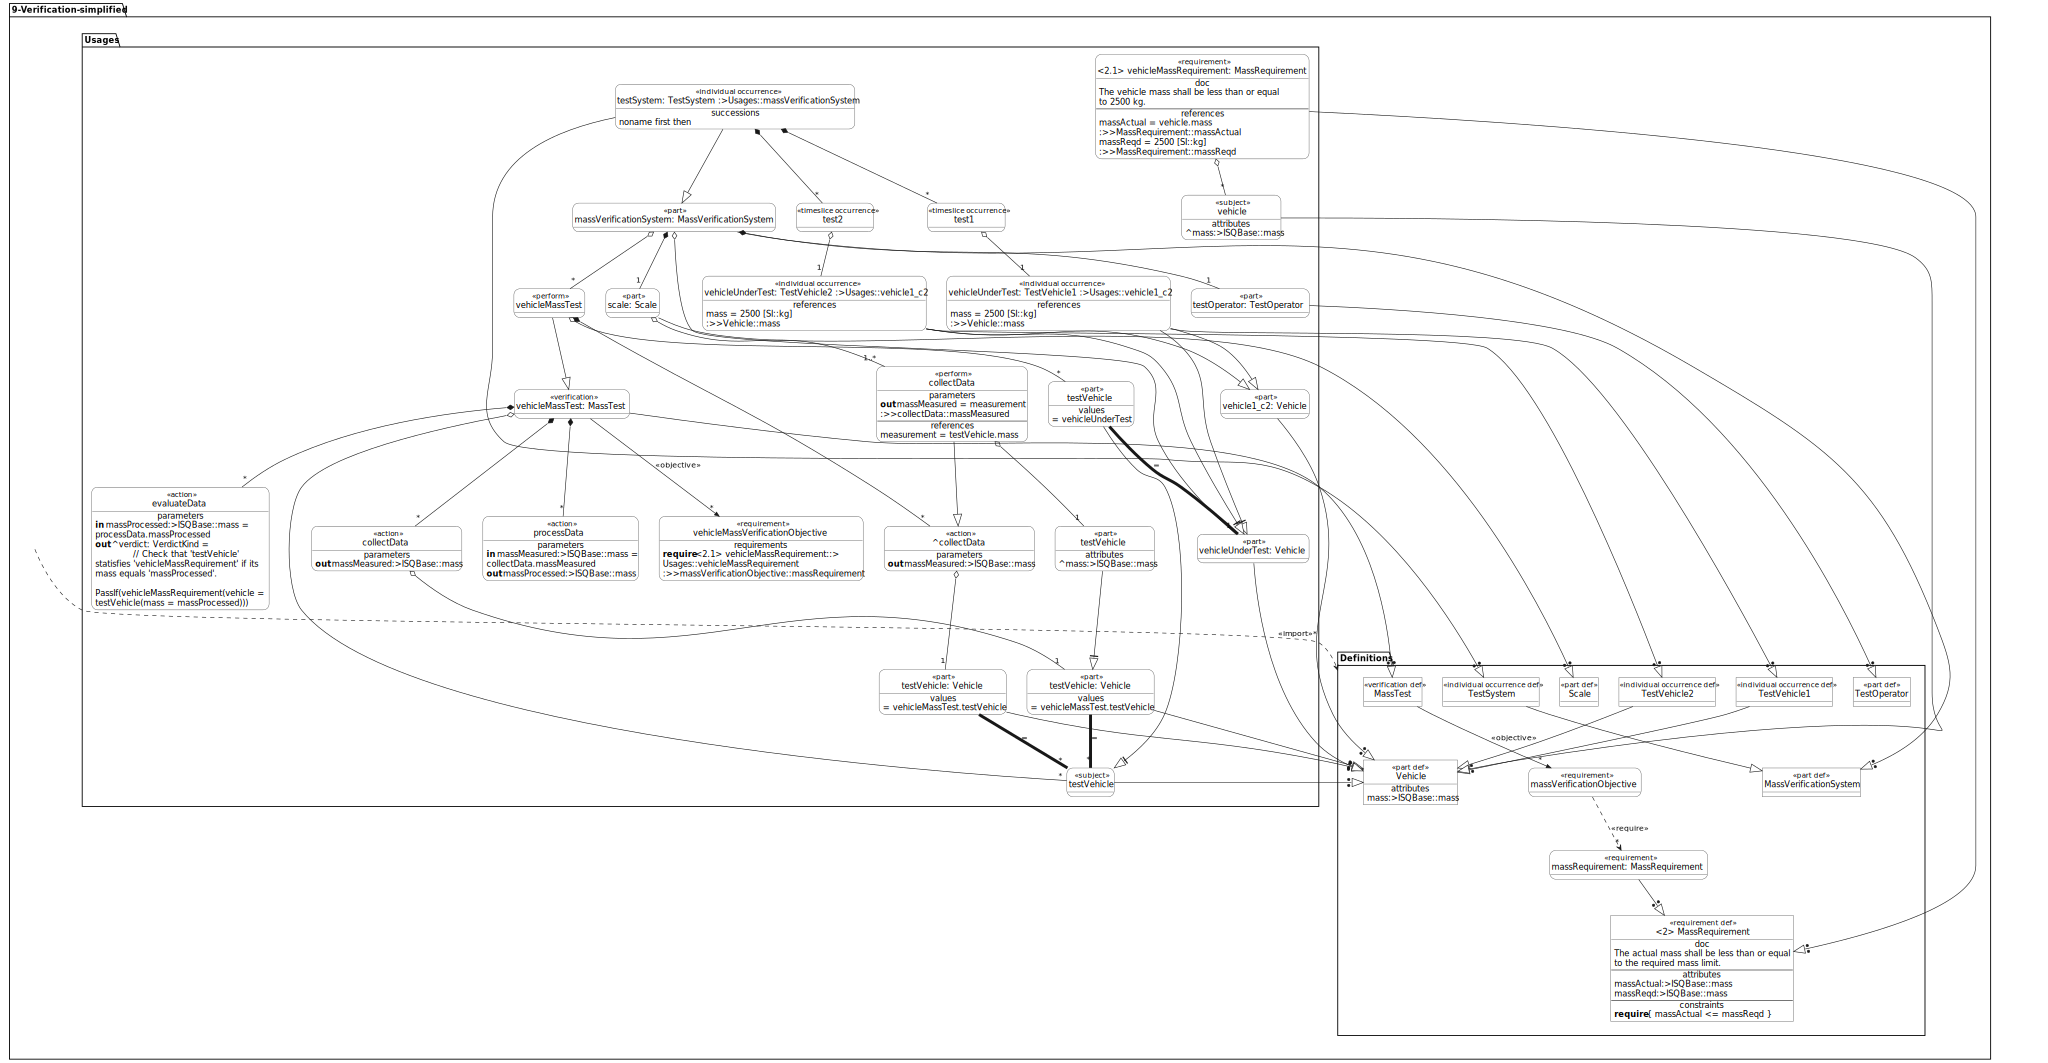

In [6]:
%viz --view=Tree '9-Verification-simplified'